# HEALTHCARE ANALYSIS ON HEART DISEASE DATA
Problem Statement: Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on all irrespective of any status. You are required to analyze this health and medical data for better future preparation. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The “goal” field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Attribute Information:

age> 2. sex> 3. chest pain type (4 values)> 4. resting blood pressure>
serum cholesterol in mg/dl> 6. fasting blood sugar > 120 mg/dl> 7. resting electrocardiographic results (values 0,1,2)> 8. maximum heart rate achieved> 9. exercise induced angina> 10. oldpeak = ST depression induced by exercise relative to rest> 11. the slope of the peak exercise ST segment> 12. number of major vessels (0-3) colored by flourosopy> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect Find key metrics and factors and show the meaningful relationships between attributes. 

Do your own research and come up with your findings.

Analysis on Heart diseas.

To predict whether the patient has heart disease or not.

In [1]:
# IMPORTING DATA AND EXPLORING DATA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 5,4
sns.set_style('whitegrid')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
hd = pd.read_csv("Heart disease.csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
hd.shape

(303, 14)

In [6]:
hd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
type(hd)

pandas.core.frame.DataFrame

In [8]:
hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA (Exploratory Data Analysis)
Using Data Visualization

1.age: Patients age in years

2.sex : Female or male (1-Male,0-Female)

3.cp :Chest pain ( 1- Typical Angina, 2-Atypical Angina,3-Non- anginal pain, 4-Asymptomatic)

4.trestbp: Resting BloodPressure

5.chol :Cholestrol

6.fbs : Fasting Blood Sugar( >120 mg/dl, 1-True, 0 - False)

7.restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8.thalach :The person's maximum heart rate achieved

9.exang : Exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11.slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12.ca :The number of major vessels (0-3)

13.thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14.target : Heart disease (0 = no, 1 = yes)

In [10]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
pd.set_option('display.float_format','{:.2f}'.format)

In [12]:
hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [13]:
hd['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
hd.shape

(303, 14)

In [15]:
hd['target'].value_counts()/hd.shape[0]*100

1   54.46
0   45.54
Name: target, dtype: float64

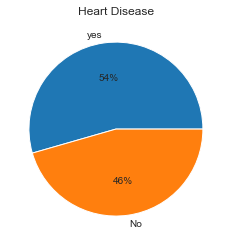

In [16]:
# percentage of positive and negative heart diseases
labels = ['yes', 'No']
values = hd['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

# Histagram plot for all feature 

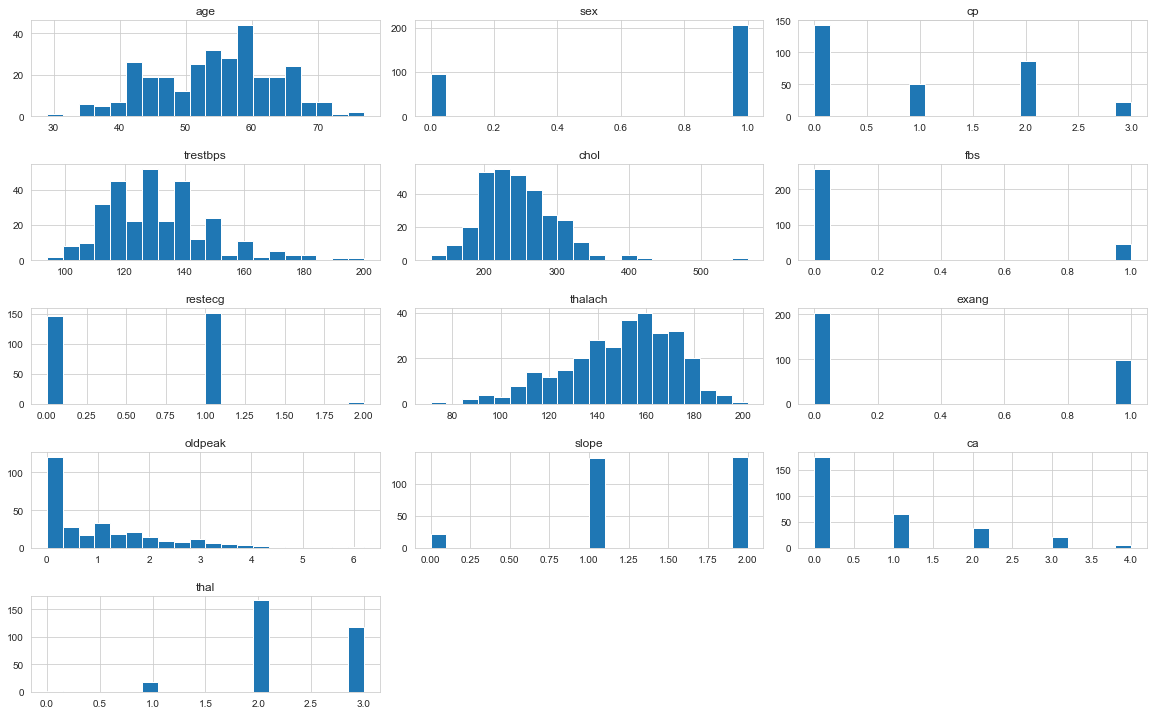

In [17]:
import itertools
col= hd.columns[:13]
plt.subplots(figsize=(20,15))
length= len(col)

for i,j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/2), 3, j+1)
    plt.subplots_adjust(wspace = 0.1,hspace= 0.5)
    hd[i].hist(bins=20)
    plt.title(i)
plt.show()

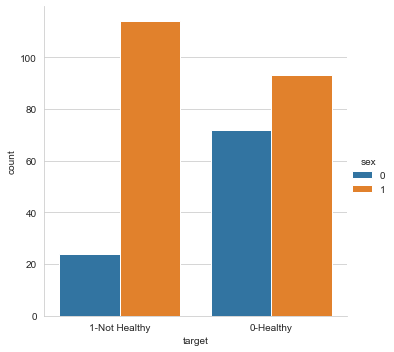

In [18]:
sns.catplot('target', data=hd, hue='sex', kind='count')
plt.xticks(np.arange(2), ("1-Not Healthy", "0-Healthy"),rotation=0);

In [19]:
hd['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

From the above Histogram plots we can conclude Age, Cholestrol, Resting blood pressure and person's maximum heart rate achieved plays major role in detection of Heart Disease.

From the another plot we can conclude that number of men are majorly having Heart disease than compared to females.And also men are more healthier than females

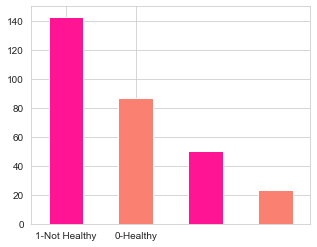

In [20]:
hd['cp'].value_counts().plot(kind='bar',color=["deeppink","salmon"])
plt.xticks(np.arange(2), ("1-Not Healthy", "0-Healthy"),rotation=0);

In [21]:
# Possibility of having Heart Disease 
#Creating a Function for unique values in data
categorical_values = []
for column in hd.columns:
    print('==============================')
    print(f"{column} : {hd[column].unique()}")
    if len(hd[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

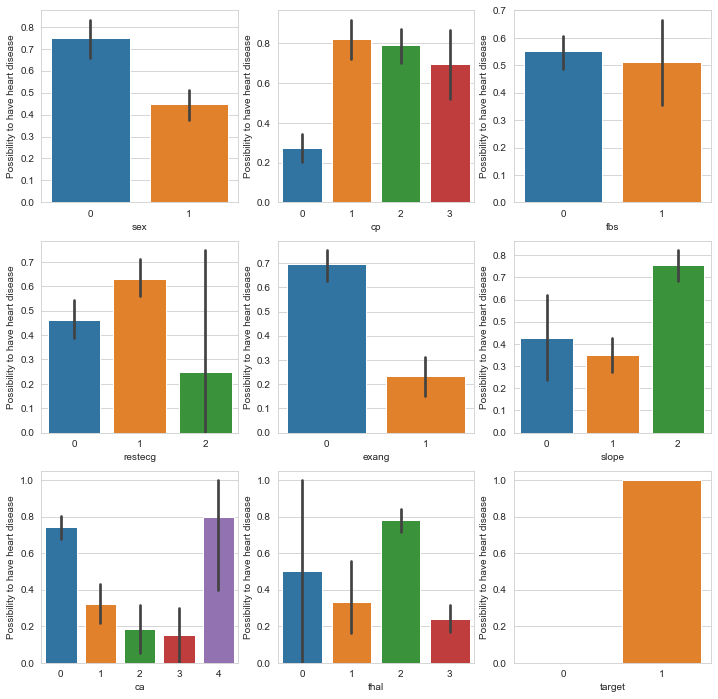

In [22]:
plt.figure(figsize=(12,  12))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=hd)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

The possibility of having Heart Disease can be judged from the above barplots.

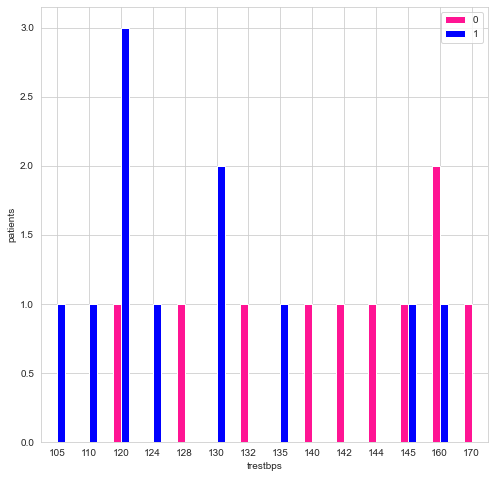

In [23]:
# Comparing resting blood pressure with target

pd.crosstab(hd.trestbps[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']);  

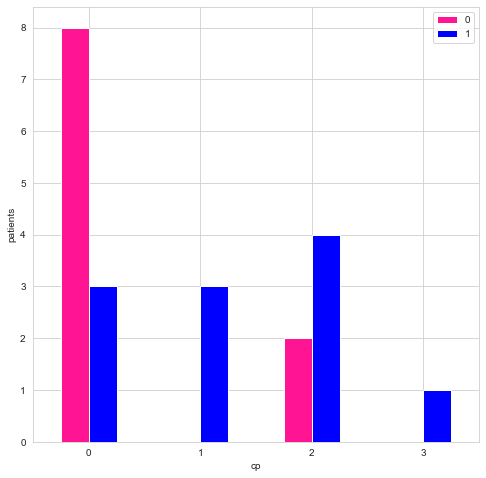

In [24]:
# Comparing cholestrol with target
#cp :Chest pain ( 1- Typical Angina, 2-Atypical Angina,3- Non-anginal pain, 4-Asymptomatic)

pd.crosstab(hd.cp[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']); 


The above graph tells us that patients with Type 3 chest pain have heart disease. and verty few Patients with 1 type chest pain have heart disease

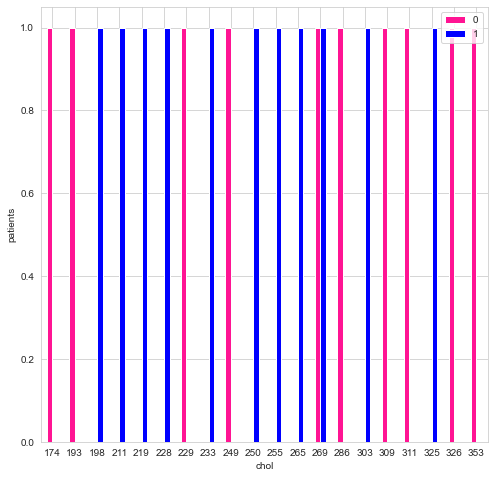

In [25]:
# Comparing cholestrol with target
pd.crosstab(hd.chol[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']); 

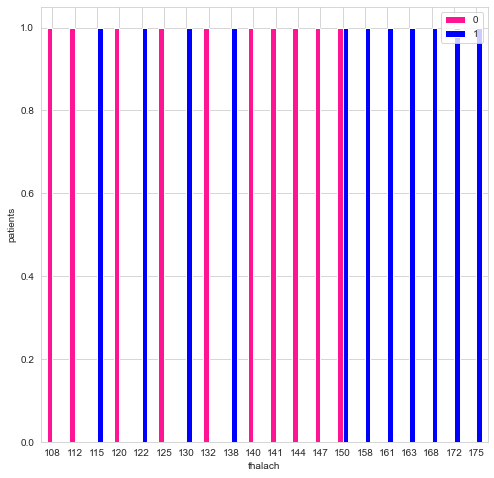

In [26]:
# Comparing maximum heart rate with target
pd.crosstab(hd.thalach[::15],hd.target).plot(kind="bar",figsize=(8,8),color=["deeppink","blue"])
plt.ylabel("patients");
plt.xticks(rotation=0);
plt.legend(['0', '1']);

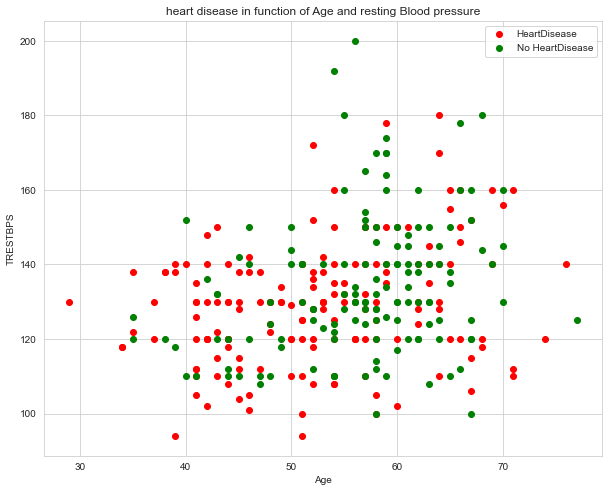

In [27]:
# fINDING Heart Disease PEOPLE WITH restingBloodPressure AND AGE  USING SCATTER PLOT

plt.figure(figsize=(10,8))
plt.scatter(hd.age[hd.target==1],hd.trestbps[hd.target==1],color="Red")

plt.scatter(hd.age[hd.target==0],hd.trestbps[hd.target==0],color="Green")

plt.title("heart disease in function of Age and resting Blood pressure")
plt.xlabel("Age")
plt.ylabel("TRESTBPS")
plt.legend(["HeartDisease","No HeartDisease"]);

<AxesSubplot:>

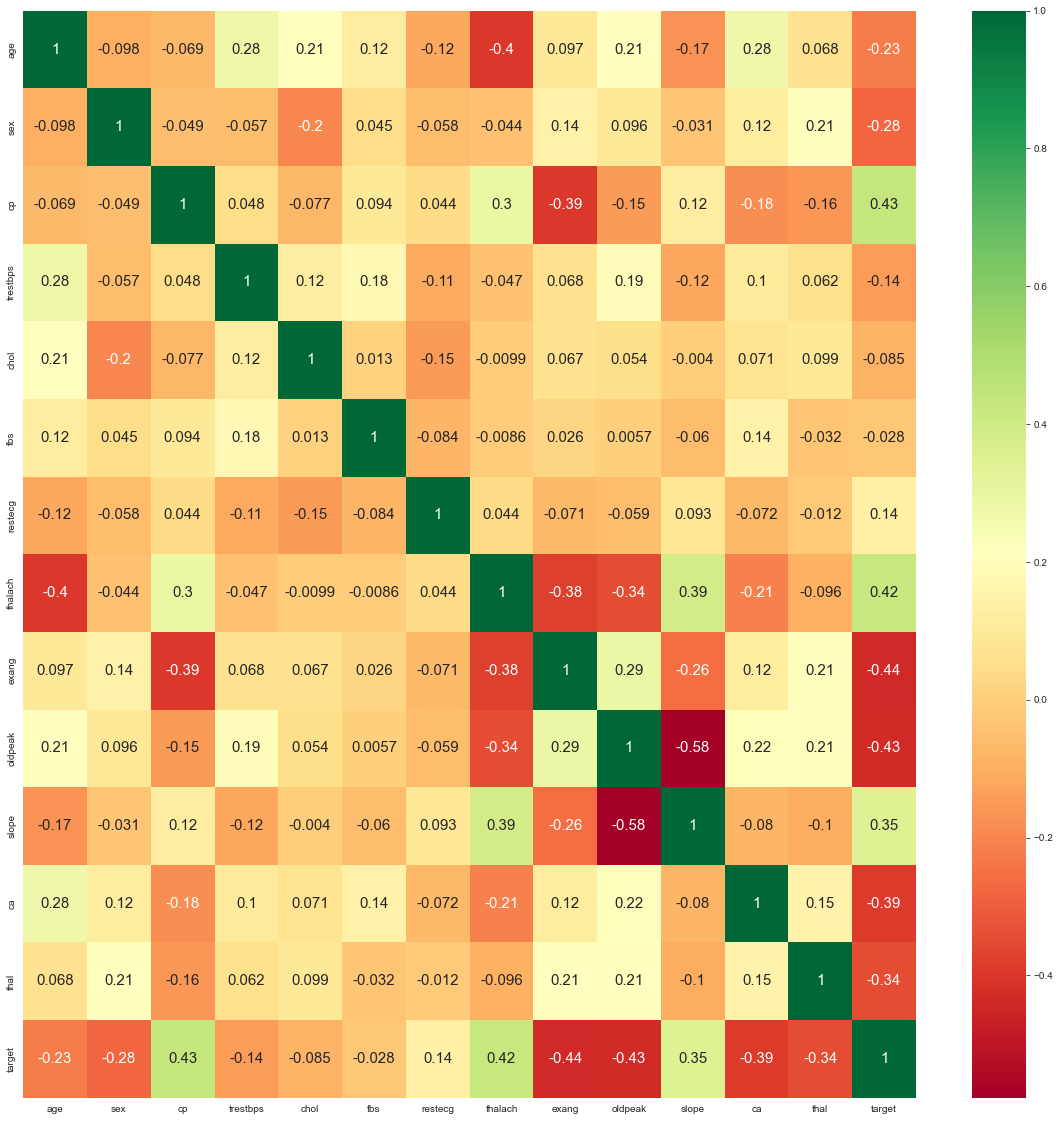

In [28]:
# To knw thw relation between various features

corr_matrix = hd.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(hd[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# OBSERVATION
1.Major features for having Heart diesease are : Resting blood pressure, Cholestrol, Chest pain and Maximum Heart rates achieved.

2.The data is not disbalanced.

3.From the another plot we can conclude that number of men are majorly having Heart disease than compared to females.And also men are more healthier than females.

4.The graph tells us that patients with Type 3 chest pain have heart disease and very few Patients with 1 type chest pain can have heart disease.

In [29]:
# creating a copy of dataset 
heart = hd.copy()

In [30]:
heart.shape

(303, 14)

In [31]:
heart = heart.rename(columns={'condition':'target'})
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


# Lets divide our data set and use training dataset for model training, and test dataset is to eveluate model perfomance

In [32]:
from sklearn.model_selection import train_test_split

x= heart.drop(columns= 'target')
y= heart.target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (227, 13), X_test size: (76, 13)


# Feature scaling


In [33]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

# Linear regression

In [34]:
from sklearn.linear_model import LinearRegression
lr_clf= LinearRegression()
lr_clf.fit(x_train_scaler, y_train)
y_pred_lr= lr_clf.predict(x_test_scaler)
lr_clf.score(x_test_scaler,y_test)

0.5377610331681861

# LOGISTIC REGRESSION


In [35]:
from sklearn.linear_model import LogisticRegression

logr_clf= LogisticRegression()
logr_clf.fit(x_train_scaler, y_train)
y_pred_lor= logr_clf.predict(x_test_scaler)
logr_clf.score(x_test_scaler,y_test)

0.868421052631579

In [53]:
print('LogistiC Regression Classification Report\n', classification_report(y_test, y_pred_lor))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_lor)*100),2)))

LogistiC Regression Classification Report
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.84      0.93      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76

Accuracy: 86.84%



In [37]:
cm = confusion_matrix(y_test, y_pred_lor)
cm

array([[28,  7],
       [ 3, 38]], dtype=int64)

# Decision Tree classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier()
dt_clf.fit(x_train_scaler, y_train)
y_pred_dct= dt_clf.predict(x_test_scaler)
dt_clf.score(x_test_scaler,y_test)

0.7763157894736842

In [54]:
print(' DT Classification Report\n', classification_report(y_test, y_pred_dct))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_dct)*100),2)))

 DT Classification Report
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.82      0.76      0.78        41

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

Accuracy: 77.63%



In [40]:
cm = confusion_matrix(y_test, y_pred_dct)
cm

array([[28,  7],
       [10, 31]], dtype=int64)

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier()
rf_clf.fit(x_train_scaler, y_train)
y_pred_rfc= rf_clf.predict(x_test_scaler)
rf_clf.score(x_test_scaler,y_test)

0.8421052631578947

In [55]:
print('Random Forest Classification Report\n', classification_report(y_test, y_pred_rfc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_rfc)*100),2)))

Random Forest Classification Report
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.87      0.83      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

Accuracy: 84.21%



In [43]:
cm = confusion_matrix(y_test, y_pred_rfc)
cm

array([[30,  5],
       [ 7, 34]], dtype=int64)

# SVM

In [51]:
from sklearn.svm import SVC

svc_clf= SVC()
svc_clf.fit(x_train_scaler, y_train)
y_pred_svc= svc_clf.predict(x_test_scaler)
svc_clf.score(x_test_scaler,y_test)

0.868421052631579

In [56]:
print(' SVM Classification Report\n', classification_report(y_test, y_pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_svc)*100),2)))

 SVM Classification Report
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        35
           1       0.84      0.93      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76

Accuracy: 86.84%



In [47]:
cm = confusion_matrix(y_test, y_pred_svc)
cm

array([[28,  7],
       [ 3, 38]], dtype=int64)

In [52]:
import pickle

filename = 'Healthcare_Analysis_on_Heart_Disease.pkl'
pickle.dump(logr_clf, open(filename, 'wb'))